#Importing Libraries

In [18]:
import pandas as pd
import os
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

#Importing Data

In [2]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)
%cd gdrive/MyDrive/Tableau_Practice/Bikes

Mounted at /content/gdrive/
/content/gdrive/MyDrive/Tableau_Practice/Bikes


In [3]:
for file in os.listdir():
  print(file)

202101-divvy-tripdata.csv
202102-divvy-tripdata.csv
202103-divvy-tripdata.csv
202104-divvy-tripdata.csv
202105-divvy-tripdata.csv
202106-divvy-tripdata.csv
202107-divvy-tripdata.csv
202108-divvy-tripdata.csv
202109-divvy-tripdata.csv
Bikes.ipynb


## Test File

On this test file we will make a pipeline of one single file and see what are the things we will like to create before creating one single file for all the 9 months of Bike Rides. 

Some of the things I will like to create for further analyzing:

1. Distances between start and end stations
2. Time of the ride

In [4]:
test = pd.read_csv('202101-divvy-tripdata.csv')
test

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.890000,-87.720000,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.900000,-87.690000,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.900000,-87.700000,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.920000,-87.690000,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.900000,-87.700000,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96829,B1A5336E1412D8BF,classic_bike,2021-01-19 19:03:17,2021-01-19 20:10:03,Lake Shore Dr & Monroe St,13300,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.880958,-87.616743,41.984037,-87.652310,member
96830,57EA5CB7DCD75F90,classic_bike,2021-01-05 18:42:27,2021-01-05 19:33:33,Lake Shore Dr & Monroe St,13300,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.880958,-87.616743,41.984037,-87.652310,member
96831,815B319A078CC984,classic_bike,2021-01-07 17:59:47,2021-01-07 19:34:03,Lakefront Trail & Bryn Mawr Ave,KA1504000152,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.984037,-87.652310,41.984037,-87.652310,member
96832,6DB04151565CEE63,classic_bike,2021-01-06 19:20:31,2021-01-06 20:41:57,Lakefront Trail & Bryn Mawr Ave,KA1504000152,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.984037,-87.652310,41.984037,-87.652310,member


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96834 entries, 0 to 96833
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             96834 non-null  object 
 1   rideable_type       96834 non-null  object 
 2   started_at          96834 non-null  object 
 3   ended_at            96834 non-null  object 
 4   start_station_name  88209 non-null  object 
 5   start_station_id    88209 non-null  object 
 6   end_station_name    86557 non-null  object 
 7   end_station_id      86557 non-null  object 
 8   start_lat           96834 non-null  float64
 9   start_lng           96834 non-null  float64
 10  end_lat             96731 non-null  float64
 11  end_lng             96731 non-null  float64
 12  member_casual       96834 non-null  object 
dtypes: float64(4), object(9)
memory usage: 9.6+ MB


Time per ride on the test file

In [6]:
test["started_at"] = pd.to_datetime(test["started_at"])
test["ended_at"] = pd.to_datetime(test["ended_at"])
test

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.890000,-87.720000,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.900000,-87.690000,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.900000,-87.700000,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.920000,-87.690000,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.900000,-87.700000,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96829,B1A5336E1412D8BF,classic_bike,2021-01-19 19:03:17,2021-01-19 20:10:03,Lake Shore Dr & Monroe St,13300,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.880958,-87.616743,41.984037,-87.652310,member
96830,57EA5CB7DCD75F90,classic_bike,2021-01-05 18:42:27,2021-01-05 19:33:33,Lake Shore Dr & Monroe St,13300,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.880958,-87.616743,41.984037,-87.652310,member
96831,815B319A078CC984,classic_bike,2021-01-07 17:59:47,2021-01-07 19:34:03,Lakefront Trail & Bryn Mawr Ave,KA1504000152,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.984037,-87.652310,41.984037,-87.652310,member
96832,6DB04151565CEE63,classic_bike,2021-01-06 19:20:31,2021-01-06 20:41:57,Lakefront Trail & Bryn Mawr Ave,KA1504000152,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.984037,-87.652310,41.984037,-87.652310,member


In [7]:
test["time_per_ride"] = (test["ended_at"] - test["started_at"])
test

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time_per_ride
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.890000,-87.720000,member,0 days 00:10:25
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.900000,-87.690000,member,0 days 00:04:04
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.900000,-87.700000,member,0 days 00:01:20
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.920000,-87.690000,member,0 days 00:11:42
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.900000,-87.700000,casual,0 days 00:00:43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96829,B1A5336E1412D8BF,classic_bike,2021-01-19 19:03:17,2021-01-19 20:10:03,Lake Shore Dr & Monroe St,13300,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.880958,-87.616743,41.984037,-87.652310,member,0 days 01:06:46
96830,57EA5CB7DCD75F90,classic_bike,2021-01-05 18:42:27,2021-01-05 19:33:33,Lake Shore Dr & Monroe St,13300,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.880958,-87.616743,41.984037,-87.652310,member,0 days 00:51:06
96831,815B319A078CC984,classic_bike,2021-01-07 17:59:47,2021-01-07 19:34:03,Lakefront Trail & Bryn Mawr Ave,KA1504000152,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.984037,-87.652310,41.984037,-87.652310,member,0 days 01:34:16
96832,6DB04151565CEE63,classic_bike,2021-01-06 19:20:31,2021-01-06 20:41:57,Lakefront Trail & Bryn Mawr Ave,KA1504000152,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.984037,-87.652310,41.984037,-87.652310,member,0 days 01:21:26


Now lets find the distance per start and end stations

In [8]:
#removing null values
test.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name     8625
start_station_id       8625
end_station_name      10277
end_station_id        10277
start_lat                 0
start_lng                 0
end_lat                 103
end_lng                 103
member_casual             0
time_per_ride             0
dtype: int64

In [9]:
test = test.dropna(subset=['end_lat', 'end_lng'])
test.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name     8625
start_station_id       8625
end_station_name      10174
end_station_id        10174
start_lat                 0
start_lng                 0
end_lat                   0
end_lng                   0
member_casual             0
time_per_ride             0
dtype: int64

In [10]:
#For distance
from geopy import distance

test["distance"] = test.apply(lambda x: distance.distance((x[8], x[9]), (x[10], x[11])).m, axis=1)
test["distance"] = round(test.distance,2)
test.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time_per_ride,distance
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member,0 days 00:10:25,2245.92
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member,0 days 00:04:04,557.77
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member,0 days 00:01:20,280.75
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member,0 days 00:11:42,2246.22
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual,0 days 00:00:43,276.46


## All 9 months data into one single Dataframe

Will make the same pipeline I did above for al 9 files.

In [11]:
%%time

bikes = []
for file in os.listdir():
  if file.endswith('.csv'):
    #Change name of column Id in work locations df, this to keep naming consitent
    df = pd.read_csv(file)
    df["started_at"] = pd.to_datetime(df["started_at"])
    df["ended_at"] = pd.to_datetime(df["ended_at"])
    df["time_per_ride"] = (df["ended_at"] - df["started_at"])
    df = df.dropna(subset=['end_lat', 'end_lng'])
    df["distance"] = df.apply(lambda x: distance.distance((x[8], x[9]), (x[10], x[11])).m, axis=1)
    df["distance"] = round(df.distance,2)

    bikes.append(df)

df = pd.concat(bikes, axis=0, ignore_index=True)
df

CPU times: user 19min 52s, sys: 6.88 s, total: 19min 59s
Wall time: 20min 16s


In [12]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time_per_ride,distance
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.890000,-87.720000,member,0 days 00:10:25,2245.92
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.900000,-87.690000,member,0 days 00:04:04,557.77
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.900000,-87.700000,member,0 days 00:01:20,280.75
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.920000,-87.690000,member,0 days 00:11:42,2246.22
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.900000,-87.700000,casual,0 days 00:00:43,276.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4352362,FA66BCAB0D73DDC2,classic_bike,2021-09-22 15:46:57,2021-09-22 16:01:15,Ellis Ave & 83rd St,584,Stony Island Ave & 75th St,KA1503000019,41.744123,-87.599034,41.758670,-87.586883,casual,0 days 00:14:18,1905.73
4352363,1D44DEFB5D36CA04,classic_bike,2021-09-25 16:25:23,2021-09-25 16:40:29,Ellis Ave & 60th St,KA1503000014,Shore Dr & 55th St,TA1308000009,41.785097,-87.601073,41.795212,-87.580715,casual,0 days 00:15:06,2031.16
4352364,6A346EA57FC23C45,classic_bike,2021-09-25 16:26:05,2021-09-25 16:40:30,Ellis Ave & 60th St,KA1503000014,Shore Dr & 55th St,TA1308000009,41.785097,-87.601073,41.795212,-87.580715,casual,0 days 00:14:25,2031.16
4352365,49360AFD771100A6,classic_bike,2021-09-15 17:57:48,2021-09-15 18:24:06,Ellis Ave & 60th St,KA1503000014,Shore Dr & 55th St,TA1308000009,41.785097,-87.601073,41.795212,-87.580715,casual,0 days 00:26:18,2031.16


In [ ]:
#df.to_csv('Bikes_all.csv', index=False)

## Exploratory Data Analysis

We can start with a very basic EDA of the Data:

1. Months with the most amount of rides
2. Days with the most amount of rides
3. Days of the week with the most amount of rides 
4. Rides per Type of ride
5. Rides with the most amount of distance
6. Rides with the most amount of time
7. Start locations with the most amount of distance
8. Start location with the most amount of rides 
9. Distances vs Days of the week
10. Member Type

### Reviewing any null values

In [13]:
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    456246
start_station_id      456243
end_station_name      487699
end_station_id        487699
start_lat                  0
start_lng                  0
end_lat                    0
end_lng                    0
member_casual              0
time_per_ride              0
distance                   0
dtype: int64

We could remove the other null values, which are from start/enc station name and id. Are those this null values represent a moyor amount of data on each column?

In [14]:
df.isnull().sum()/len(df)*100

ride_id                0.000000
rideable_type          0.000000
started_at             0.000000
ended_at               0.000000
start_station_name    10.482710
start_station_id      10.482641
end_station_name      11.205374
end_station_id        11.205374
start_lat              0.000000
start_lng              0.000000
end_lat                0.000000
end_lng                0.000000
member_casual          0.000000
time_per_ride          0.000000
distance               0.000000
dtype: float64

We see there are roughly the 11% of data per column. We could leave it how it is right now, and at the end we could drop those null values in case we want to make an analysis on the Stations. 

### Months with the most amount of rides

In [17]:
df_copy = df.copy()
df_copy.created_on = pd.to_datetime(df_copy["started_at"])
df_copy["started_at"] = df_copy["started_at"].dt.to_period(freq = "M")
month_df = df_copy.groupby("started_at").size()
print(month_df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


started_at
2021-01     96731
2021-02     49408
2021-03    228329
2021-04    336963
2021-05    531181
2021-06    728878
2021-07    821679
2021-08    803646
2021-09    755552
Freq: M, dtype: int64


Text(0, 0.5, 'Amount')

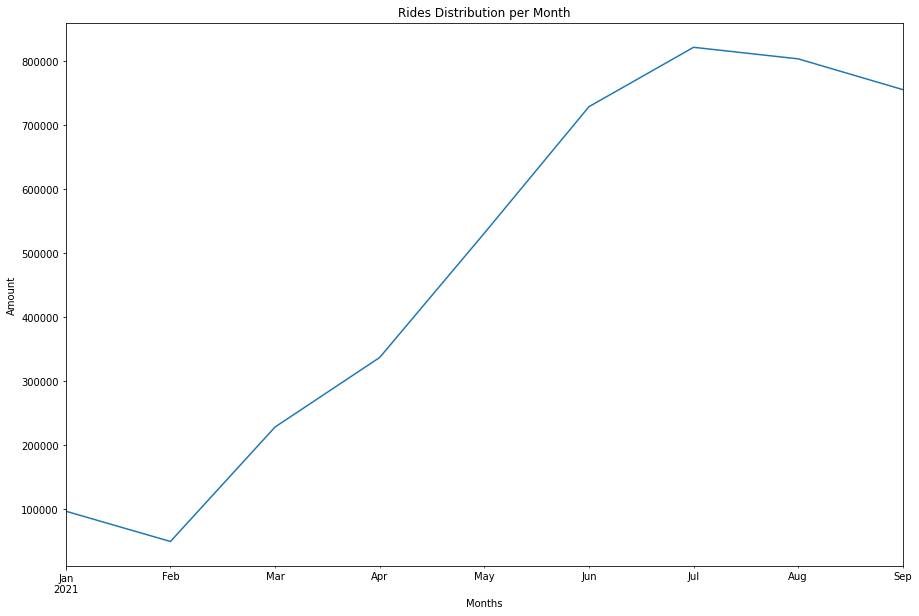

In [20]:
plt.figure(figsize = (15,10))
month_df.plot(x="started_at")
plt.title("Rides Distribution per Month")
plt.xlabel("Months")
plt.ylabel("Amount")

### Days with the most amount of rides

In [21]:
df_copy = df.copy()
df_copy.created_at = pd.to_datetime(df_copy["started_at"])
df_copy["started_at"] = df_copy["started_at"].dt.to_period(freq = "D")
days_df = df_copy.groupby("started_at").size()
print(days_df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


started_at
2021-01-01     1066
2021-01-02     2274
2021-01-03     2382
2021-01-04     3200
2021-01-05     3844
              ...  
2021-09-26    26678
2021-09-27    21669
2021-09-28    22748
2021-09-29    23634
2021-09-30    24068
Freq: D, Length: 273, dtype: int64


Text(0, 0.5, 'Amount')

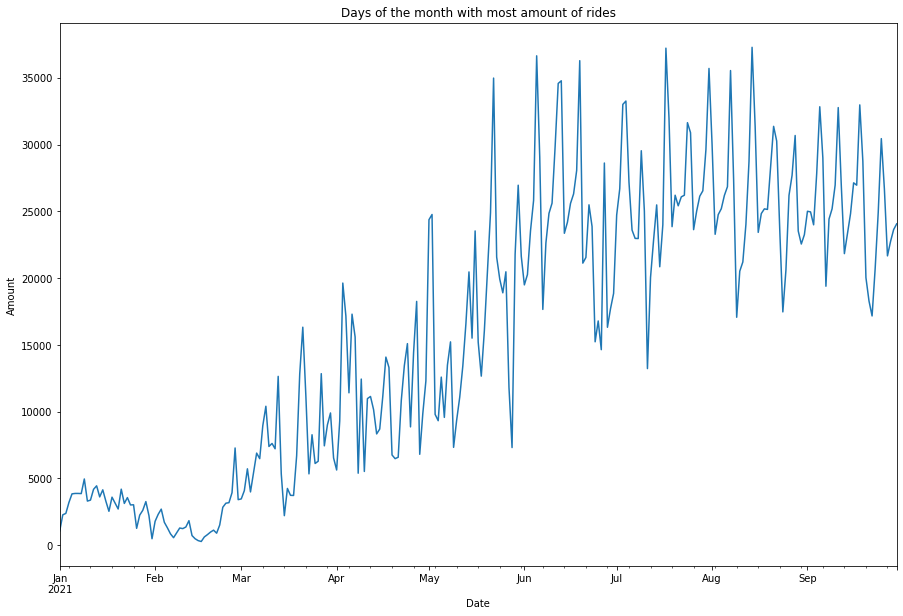

In [22]:
plt.figure(figsize = (15,10))
days_df.plot(x="started_at")
plt.title("Days of the month with most amount of rides")
plt.xlabel("Date")
plt.ylabel("Amount")

#### Days of the week with the most amount rides

In [23]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_copy = df.copy()
df_copy.created_at = pd.to_datetime(df_copy["started_at"])
df_copy["started_at"] = df_copy["started_at"].dt.day_name()
week_df = df_copy.groupby("started_at").size().reindex(cats) 
print(week_df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


started_at
Monday       548314
Tuesday      559163
Wednesday    573234
Thursday     577243
Friday       625053
Saturday     781421
Sunday       687939
dtype: int64


Text(0, 0.5, 'Amount')

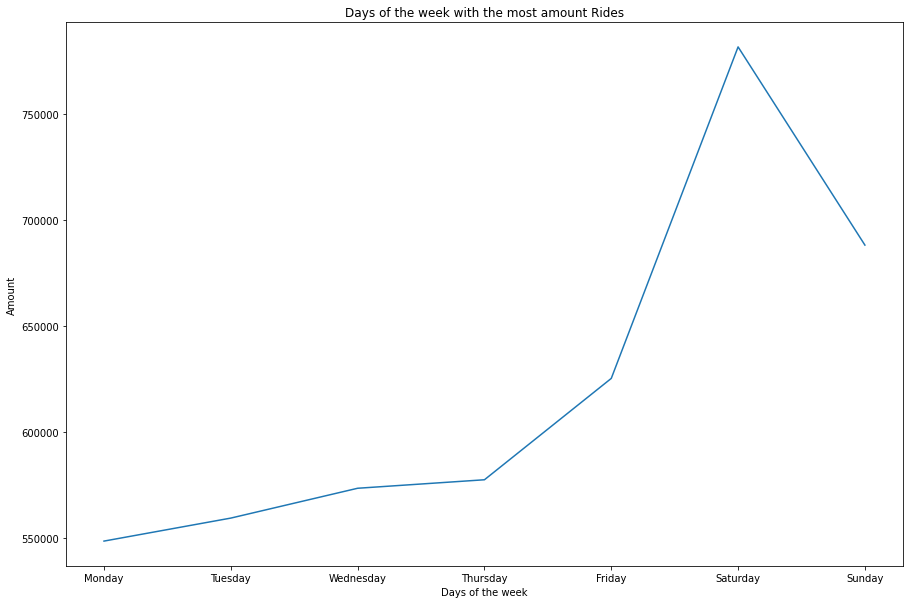

In [24]:
plt.figure(figsize = (15,10))
week_df.plot(x="started_at")
plt.title("Days of the week with the most amount Rides")
plt.xlabel("Days of the week")
plt.ylabel("Amount")

Days of the week distribution vs Distance

Text(0.5, 1.0, 'Boxplot of total_earning not Taken vs. Day of the Week')

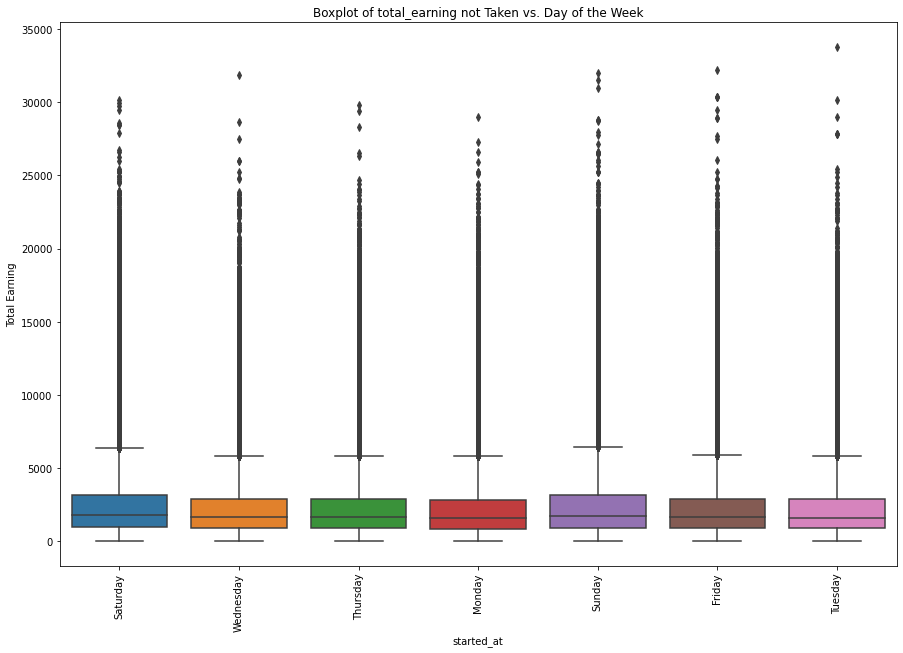

In [28]:
plt.figure(figsize=(15,10))
sns.boxplot(x = df_copy["started_at"], y='distance', data = df_copy)
title_string = "Boxplot of Distances vs. Day of the Week"
plt.ylabel("Distance")
plt.xticks(rotation='vertical')
plt.title(title_string)

In [45]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_copy = df.copy()
df_copy.created_at = pd.to_datetime(df_copy["started_at"])
df_copy["started_at"] = df_copy["started_at"].dt.day_name()
week_df = df_copy.groupby("started_at")["distance"].sum().reindex(cats)  #.reindex(cats) 
print(week_df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


started_at
Monday       1.181717e+09
Tuesday      1.213431e+09
Wednesday    1.252209e+09
Thursday     1.264654e+09
Friday       1.384705e+09
Saturday     1.824671e+09
Sunday       1.592735e+09
Name: distance, dtype: float64


Text(0, 0.5, 'Amount')

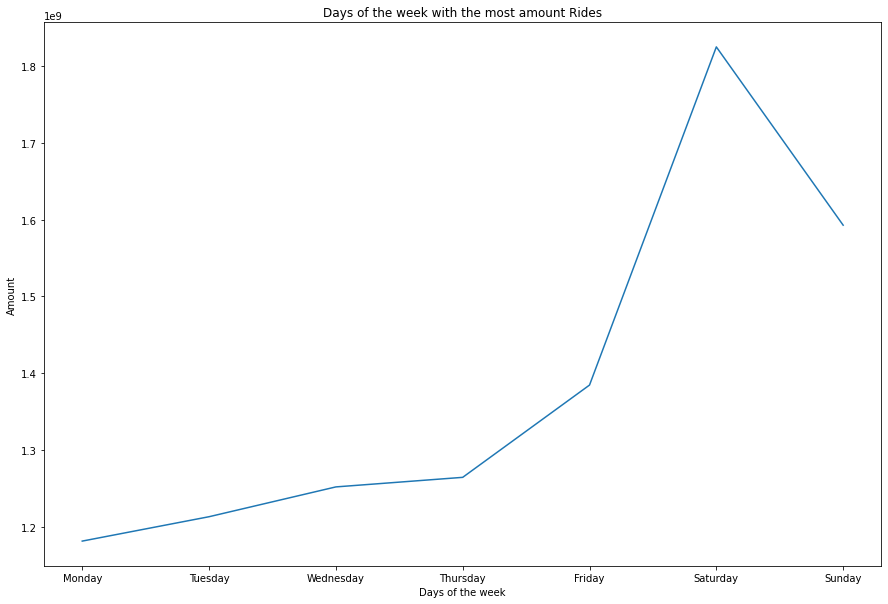

In [46]:
plt.figure(figsize = (15,10))
week_df.plot(x="started_at")
plt.title("Days of the week with the most amount of Distance")
plt.xlabel("Days of the week")
plt.ylabel("Amount")

## member and bike type

In [25]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'time_per_ride', 'distance'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


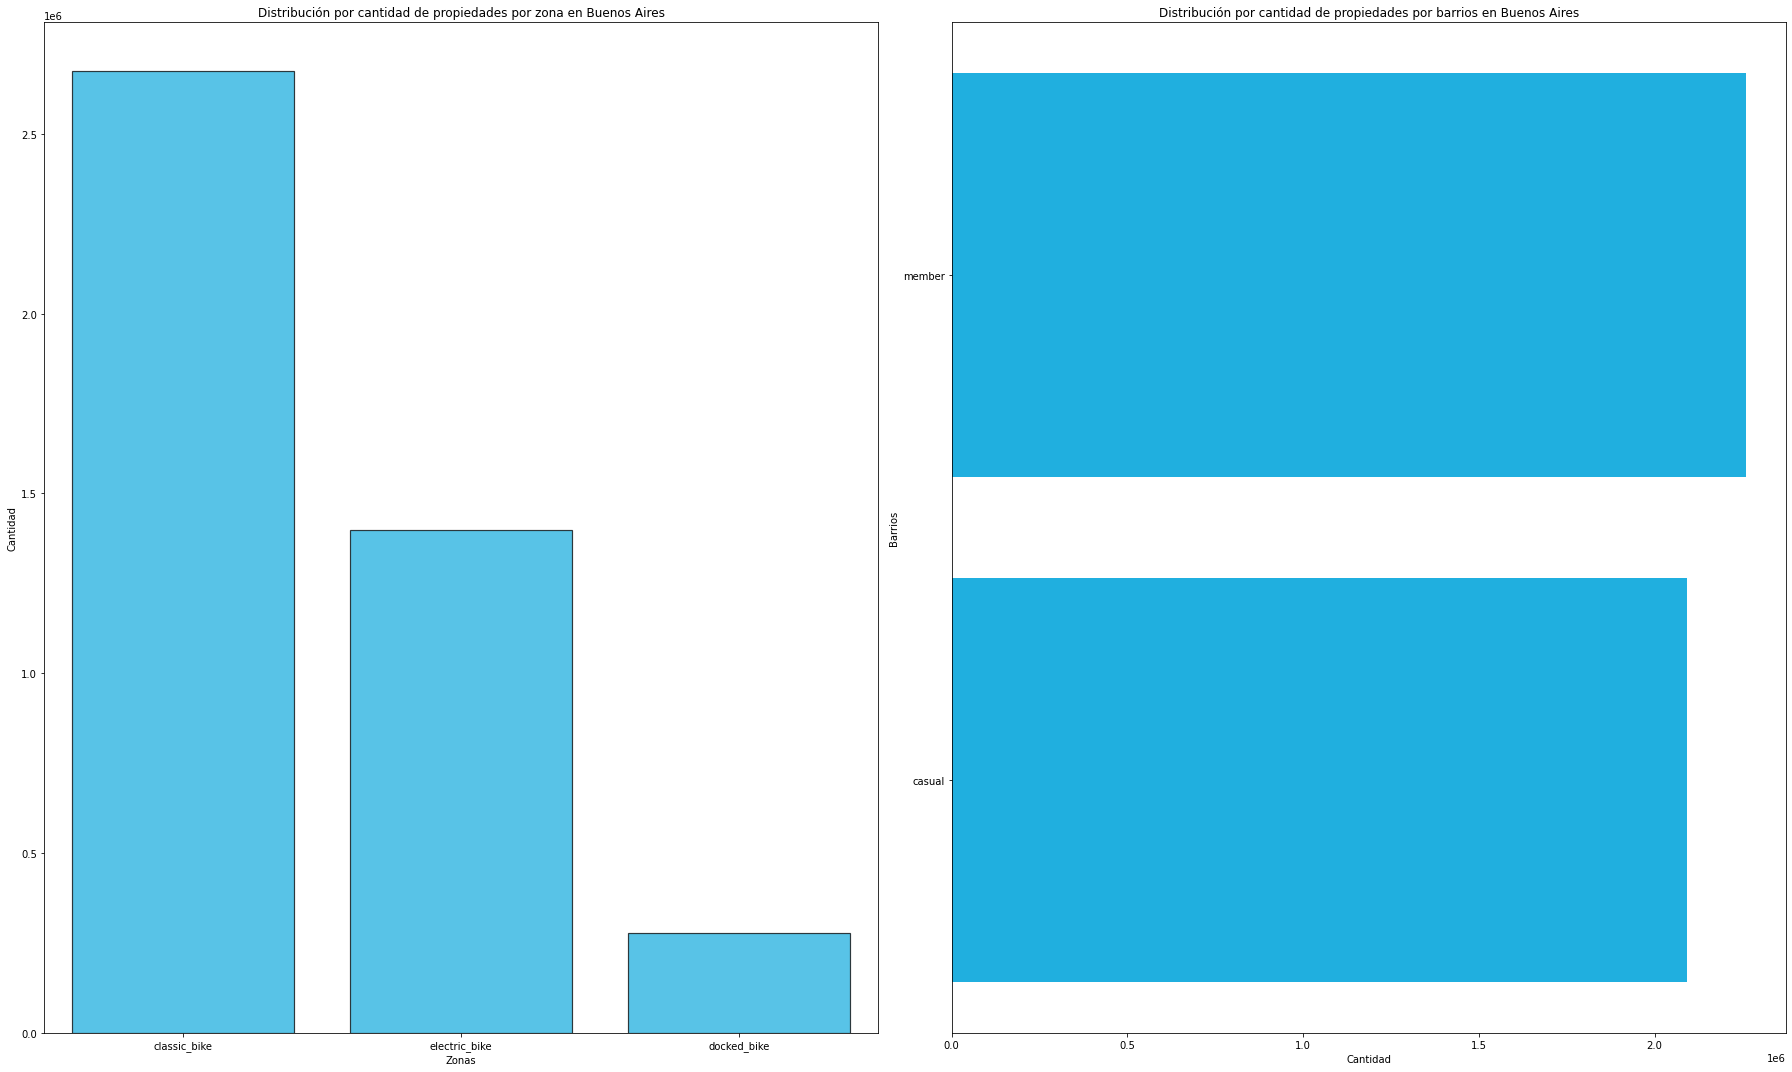

In [26]:
plt.figure(figsize = (25,15))
plt.subplot(1,2,1)
sns.countplot("rideable_type", data=df, alpha = 0.75, edgecolor='black', linewidth=1.2, order= df["rideable_type"].value_counts().index, color='deepskyblue')
plt.title("Distribución por cantidad de propiedades por zona en Buenos Aires")
plt.xlabel("Zonas")
plt.ylabel("Cantidad")

plt.subplot(1,2,2)
sns.countplot(data = df, y = "member_casual", order= df["member_casual"].value_counts().index, color='deepskyblue') 
plt.title("Distribución por cantidad de propiedades por barrios en Buenos Aires")
plt.xlabel("Cantidad")
plt.ylabel("Barrios")
plt.tight_layout()
plt.show()